# Task 5:- Exploratory Data Analysis - Sports

**Author:- Lokesh Attarde**

Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’ and find out the most successful teams, players and factors contributing win or loss of a team and also Suggest teams or players a company should endorse for its products.

Link to Dataset:- https://bit.ly/34SRn3b

In [1]:
#Importing Libraries -
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to avoid warnings during execution
from warnings import filterwarnings
filterwarnings('ignore') 

In [2]:
#Reading data -
df1 = pd.read_csv('../Indian Premier League/deliveries.csv')
df2 = pd.read_csv('../Indian Premier League/matches.csv')

**Preliminary Analysis -**

In [3]:
#Reading First 5 entries from "deliveries" Dataset -
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
#Checking the Shape of the "df1" DataFrame -
df1.shape

(179078, 21)

In [5]:
#Reading First 5 entries from "matches" Dataset -
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
#Checking the Shape of the "df2" DataFrame -
df2.shape

(756, 18)

In [7]:
#Checking the 'Columns' in "deliveries" DataFrame -
df1.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
#Checking the 'Columns' in "matches" DataFrame -
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Checking the presence of Null Values -**


In [9]:
#in deliveries -
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [10]:
#in matches -
df2.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [11]:
#Removing "umpire3" because it has too many Null Values -
df2.drop(['umpire3'],inplace=True,axis=1)

In [12]:
df2.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

**Analysing Number of Matches in each season -**


In [13]:
#Checking the absolute Number of Matches -
df2['season'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

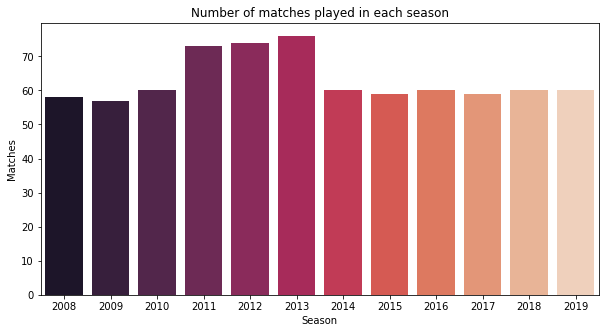

In [14]:
plt.figure(figsize=(10,5))
sns.countplot("season",data = df2,palette='rocket',)
plt.title("Number of matches played in each season")
plt.xlabel("Season")
plt.ylabel("Matches")
plt.show()

**Observation:** Most Number of Matches were played in the year 2013. (i.e. in Total 76 Matches)

# Most Successful Teams: (In terms of Number of Seasons Won) -

In [15]:
winner = df2.groupby("season")["winner"].value_counts()
winner

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [16]:
teams_per_season = df2.groupby('season')['winner'].value_counts()
year=2008     #initialize starting value for year
wins_per_season = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        #print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        wins_per_season = wins_per_season.append(win_series)
        year += 1  
print(wins_per_season.to_string(index=False))

year                  team wins
2008      Rajasthan Royals   13
2009      Delhi Daredevils   10
2010        Mumbai Indians   11
2011   Chennai Super Kings   11
2012 Kolkata Knight Riders   12
2013        Mumbai Indians   13
2014       Kings XI Punjab   12
2015   Chennai Super Kings   10
2016   Sunrisers Hyderabad   11
2017        Mumbai Indians   12
2018   Chennai Super Kings   11
2019        Mumbai Indians   11


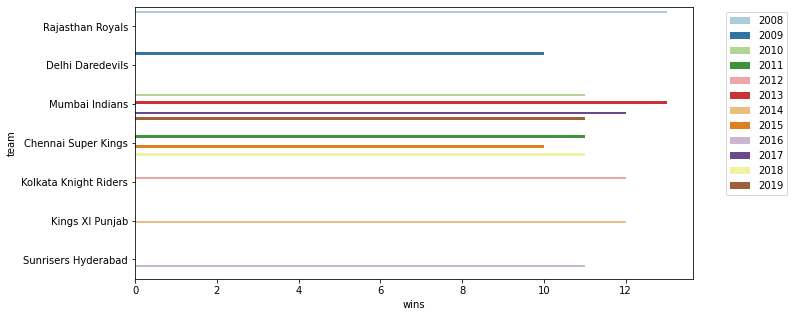

In [17]:
plt.figure(figsize=(10,5))
sns.barplot('wins', 'team', hue='year', data=wins_per_season, palette='Paired');
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.show()

**Observation:** "**Mumbai Indians**" have secured most wins in 4 seasons:- 2010,2013,2017,2019 as so are the best team, followed by "**Chennai Super kings**".

# Analysing Most Successful Team wrt Number of Matches Won -

In [18]:
#Analysing Most Successful Team wrt Number of Matches Won -
team = df2['winner'].value_counts(ascending=False)
team.reset_index()

,index,winner
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


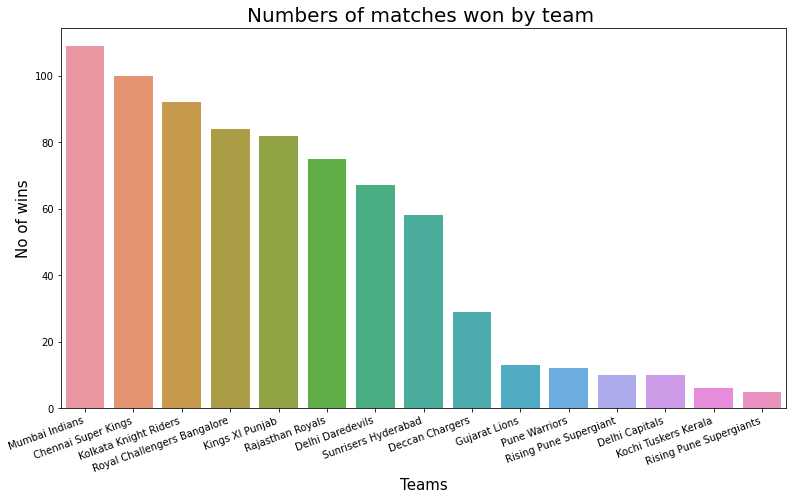

In [19]:
#Plotting data for most successful team wrt number of matches won
plt.figure(figsize = (13,7))
sns.countplot(x='winner',data=df2,order=team.index)
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=20, horizontalalignment="right")
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

**Observation:** Maximum matches are won by "**Mumbai Indians**" followed by "**Chennai Super Kings**" then "**Kolkata Knight Riders**".

# Toss Decisions across Seasons -

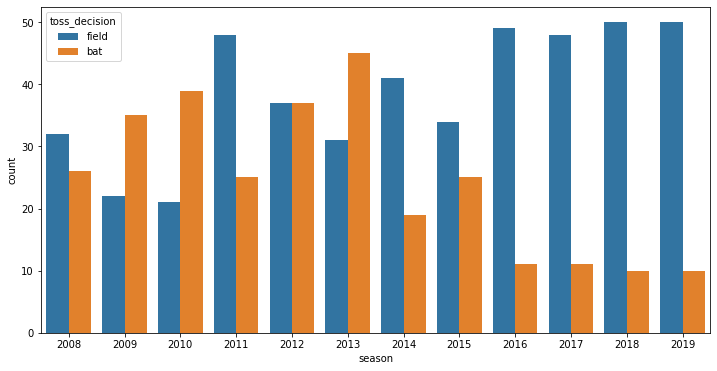

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='season',hue='toss_decision',data=df2)
plt.show()

**Observation:** The decision for Batting or Fielding varies largely across the Seasons. In some seasons like 2009,2010,2013 toss winners opted for Batting. But, after 2013 the majority of toss winners opted for Fielding.

# Maximum Toss Winners across all Seasons -

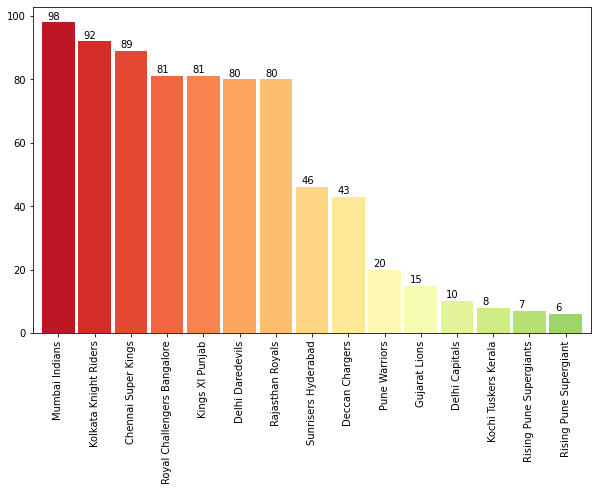

In [21]:
plt.subplots(figsize=(10,6))
ax=df2['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

**Observation:** 
- "**Mumbai Indians**" seem to be very lucky having the higest win in tosses follwed by "**Kolkata Knight Riders**". 
- "**Pune Supergiants**" have the lowest toss wins.

In [22]:
#Checking the Shape when 'toss_winner' equals to 'winner' it means When the Toss Winner is the Match Winner.
df=df2[df2['toss_winner']==df2['winner']]
df.shape

(393, 17)

In [23]:
#Checking the Shape when 'toss_winner' not equals to 'winner' it means When the Toss Winner is not the Match Winner.
df=df2[df2['toss_winner']!=df2['winner']]
df.shape

(363, 17)

# Analysing Number of times Toss Winner is also the Match Winner -

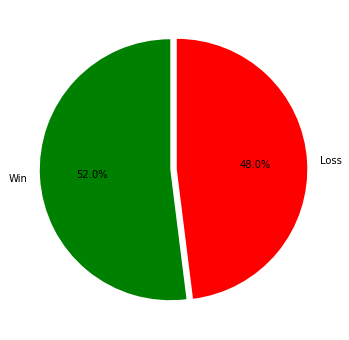

In [24]:
df3=df2[df2['toss_winner']==df2['winner']]
df4=df2[df2['toss_winner']!=df2['winner']]
#Creating a Pie Chart -
slices=[len(df3),len(df4)]
labels=['Win','Loss']
plt.pie(slices,labels=labels,startangle=90,explode=(0,0.05),autopct='%1.1f%%',colors=['g','r'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()


**Observation:** Toss winner is not necessarily the match winner. The match winning probability for toss winning team is about 50%-50%.



# Analying Top 10 Player who won Man of the Match awards at max. -

In [25]:
player=df2['player_of_match'].value_counts()[:10]
print(player)

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64


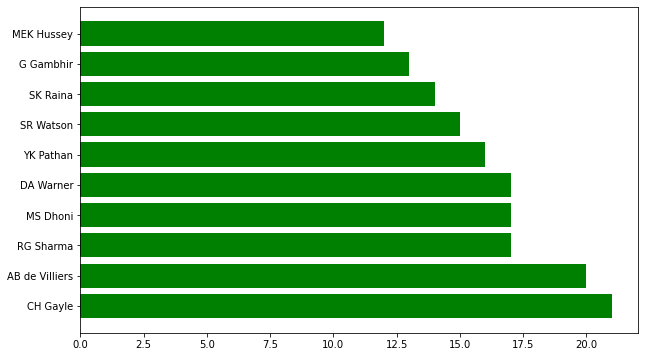

In [26]:
#Plotting the above data -
plt.figure(figsize=(10,6))
plt.barh(player.index,player.values,color='g')
plt.show()

**Observation:** Maximun Man of the Match awards are won by "**CH Gale**", followed by "**AD de Villiers**", "**RG Sharma**", "**MS Doni**", "**DA Warner**". These are preffered players for endorsement of products.

# Analysis On Bowlers - 

**Top 10 Wicket Takers -**

In [27]:
wickets=df1[df1['dismissal_kind'].isin(['caught', 'bowled',  'lbw', 'caught and bowled','stumped', 'hit wicket'])]
bowlers=wickets.groupby("bowler")["dismissal_kind"].count().sort_values(ascending=False).head(10)
bowlers

bowler
SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
B Kumar            133
R Ashwin           125
SP Narine          122
UT Yadav           119
RA Jadeja          108
Name: dismissal_kind, dtype: int64

<AxesSubplot:xlabel='bowler'>

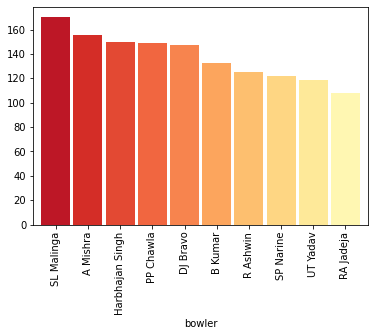

In [28]:
bowlers.plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20),)

**Observation:** Top wicket taker in IPL is "**SL Malinga**" followed by "**A Mishra**" and "**Harbhajan Singh**".

# Analysis on Batsmen -

**Top 10 Batsmen in terms of Total Runs Scored -**

In [29]:
#Top 10 Batsmen -
max_runs=df1.groupby(['batsman'])['batsman_runs'].sum().reset_index()
max_runs.sort_values('batsman_runs', ascending=False).head(10)

,batsman,batsman_runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632
92,CH Gayle,4560
290,MS Dhoni,4477
384,RV Uthappa,4446
26,AB de Villiers,4428
147,G Gambhir,4223


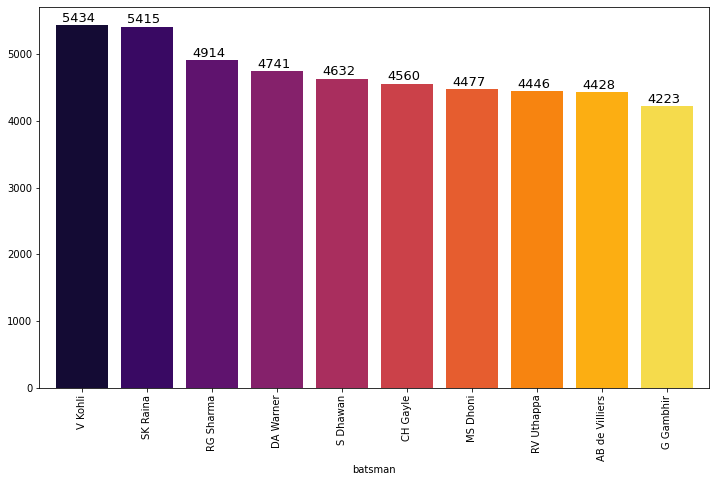

In [30]:
plt.subplots(figsize=(12,7))
max_runs=df1.groupby(['batsman'])['batsman_runs'].sum()
ax=max_runs.sort_values(ascending=False)[:10].plot.bar(width=0.8,color=sns.color_palette('inferno',10))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+50),fontsize=13)
plt.show()

**Observation:** Top 3 Batsmen in terms of Total Runs Scored is "**Virat Kohli**" followed by "**Suresh Raina**" and "**Rohit Sharma**". These are preffered players for endorsement of products.